In [20]:
import operator
from copy import deepcopy
from lsst.afw.math import afwMath
import lsst.afw.image as afwImage
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy


import lsst.afw.math as afwMath
import Utils.DiaSourceTools as DSTools

In [21]:
def get_mean( calexp):
    mi = calexp.getMaskedImage()
    bad = ~calexp.getMaskedImage().getMask().getPlaneBitMask(['DETECTED' ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.MEAN, sctrl)
    return (stats.getValue(afwMath.MEAN))

def get_threshold( dayDiff):
    factor = 1

    mi = dayDiff.getMaskedImage()
    bad = dayDiff.getMaskedImage().getMask().getPlaneBitMask(['BAD', 'SAT', 'EDGE', 'NO_DATA', 'DETECTED_NEGATIVE'])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.STDEVCLIP, sctrl)
    thres = (stats.getValue(afwMath.STDEVCLIP) * factor)
    return thres


def get_weight( calexp):

    statsCtrl = afwMath.StatisticsControl()
    statsCtrl.setNumSigmaClip(3.0)
    statsCtrl.setNumIter(2)
    statsCtrl.setAndMask(afwImage.MaskU.getPlaneBitMask(['NO_DATA', 'BAD', 'EDGE', 'SAT', 'DETECTED_NEGATIVE']))
    statsCtrl.setNanSafe(True)



    maskedImage = calexp.getMaskedImage()
    statObj = afwMath.makeStatistics(maskedImage.getVariance(), maskedImage.getMask(), afwMath.MEANCLIP, statsCtrl)
    meanVar, meanVarErr = statObj.getResult(afwMath.MEANCLIP)
    weight = 1 / float(meanVar)
    return weight


In [ ]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Tests/"
DATADIR_CONTROL=DATADIR+"/control"
butler = dafPersist.Butler(DATADIR+"tests15")

In [44]:
test_patch = "6,6"
tempexps = butler.subset("deepCoadd_tempExp", dataId={"filter":"r","tract":0, "patch":test_patch, "runId":"05AL01"})

In [45]:
#DSTools.detect_diasources(texp)


In [46]:
p_coadds = []
for t in tempexps:
    if butler.datasetExists("deepCoadd_tempExp", dataId= t.dataId):
        texp = butler.get("deepCoadd_tempExp", dataId= t.dataId)
        #DSTools.detect_diasources(texp)
        print t.dataId["visit"] , get_weight(texp)
        #p_coadds.append((get_weight(texp), t.dataId["visit"]))
        p_coadds.append((get_mean(texp)/get_threshold(texp), t.dataId["visit"]))

780352 0.00345941082319
780353 0.00340258623749
780354 0.00346164475622
780355 0.00349435542924
780356 0.00536514511559
780829 0.00226092176593
780830 0.00226415319157
780832 0.00228360113971
780833 0.00229087372977
780834 0.00357989470058
780835 0.0022738904758
781475 0.00312904285839
781476 0.00306921895068
781477 0.0030019194857
781478 0.0029654469679
781479 0.00441215213506
784257 0.00221375353326
784259 0.00221294715862
784260 0.0022472737575
784261 0.00226282006189
784262 0.00334251561221
784394 0.00268833318806
784514 0.00308141365049
784515 0.00306614730921
784516 0.00310977694836
784517 0.00309229215413
784518 0.00448562650054
787671 0.000981742863799
787673 0.000914292942924
787674 0.00067830115591
787675 0.000626943142697
787676 0.000828899904067
787677 0.000936435722156
788099 0.00176566191765
788100 0.0017791678605
788101 0.00177666776757
788103 0.00179516965657
788104 0.00256109340763
788482 0.00292152719459
788483 0.00290131961005
788484 0.00290805881479
788485 0.0028404

In [47]:
p_coadds.sort()
p_coadds[-15:]

[(0.11629937377788056, 781479),
 (0.11641478599611543, 788483),
 (0.11748547323995175, 802228),
 (0.11769667721128214, 800721),
 (0.11799095183409443, 784516),
 (0.11799097988472619, 800718),
 (0.11933522763591511, 796722),
 (0.11938646274329229, 796723),
 (0.12179500477079389, 801146),
 (0.1233879868830508, 800719),
 (0.12434234658828135, 780354),
 (0.12549176490727065, 801148),
 (0.12689188158028866, 780356),
 (0.12927659272170602, 802229),
 (0.13436402664530214, 802231)]

In [48]:
p_coadds = []
for t in tempexps:
    if butler.datasetExists("deepCoadd_tempExp", dataId= t.dataId):
        texp = butler.get("deepCoadd_tempExp", dataId= t.dataId)
        DSTools.detect_diasources(texp)
        print t.dataId["visit"] , get_weight(texp)
        #p_coadds.append((get_weight(texp), t.dataId["visit"]))
        p_coadds.append((get_weight(texp), t.dataId["visit"]))

780352 0.00345939969002
780353 0.00340259043883
780354 0.0034616506557
780355 0.00349437707419
780356 0.00350972909501
780829 0.00226084621632
780830 0.00226405937865
780832 0.002283622652
780833 0.00229089884622
780834 0.00228657777191
780835 0.00227382783985
781475 0.00312901362557
781476 0.00306910387716
781477 0.00300188142443
781478 0.00296541509579
781479 0.00284872340233
784257 0.00221370128793
784259 0.00221297379285
784260 0.00224728308492
784261 0.00226272133762
784262 0.00225945285756
784394 0.00268835028265
784514 0.00308137382697
784515 0.00306613878451
784516 0.00310973817272
784517 0.00309227008506
784518 0.00303921199429
787671 0.000981742128865
787673 0.000914289036379
787674 0.000678297228332
787675 0.000450182390488
787676 0.000828906056
787677 0.000672407881398
788099 0.00176561790346
788100 0.00177919517966
788101 0.00177666882976
788103 0.00179514358485
788104 0.00183914367182
788482 0.00292149639941
788483 0.00290124185083
788484 0.00290809148178
788485 0.0028403

In [60]:
p_coadds.append((11111,0))
p_coadds.sort()
p_coadds[-1:]

[(11111, 0)]

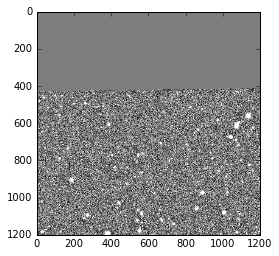

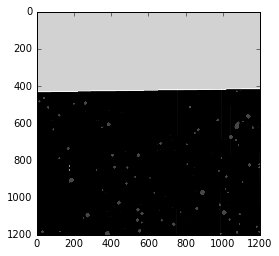

In [50]:
#dataId={"filter":"r","tract":0, "patch":"15,15", "visit":800720}
#texp = butler.get("deepCoadd_tempExp", dataId=dataId)

mi = texp.getMaskedImage()
im = mi.getImage()
imarray = im.getArray()
plt.imshow(imarray, cmap="gray", vmin= imarray.mean()-imarray.std(), vmax = imarray.mean()+imarray.std())
plt.show()
plt.imshow(mi.getMask().getArray(), cmap="gray")
plt.show()

In [61]:
maskarray = mi.getMask().getArray()

ndata = afwImage.MaskU.getPlaneBitMask(['DETECTED_NEGATIVE'])

newarray = deepcopy(maskarray)

newarray[newarray & ndata != 0] = 1000

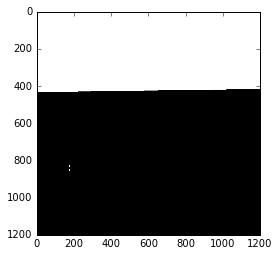

In [62]:
plt.imshow(newarray, vmin=999, vmax=1000, cmap="gray")
plt.show()

In [63]:
mu = afwImage.MaskU
mu.getMaskPlaneDict(mi.getMask())

{u'BAD': 0L,
 u'CLIPPED': 9L,
 u'CR': 3L,
 u'DETECTED': 5L,
 u'DETECTED_NEGATIVE': 6L,
 u'EDGE': 4L,
 u'INTRP': 2L,
 u'NOT_DEBLENDED': 10L,
 u'NO_DATA': 8L,
 u'SAT': 1L,
 u'SUSPECT': 7L,
 u'UNMASKEDNAN': 11L}

In [58]:
DATADIR_CONTROL=DATADIR+"/control"
butler_control = dafPersist.Butler(DATADIR+"control15")

In [56]:
#test
len(butler.get("dayDiff_class_diaSrc", dataId={"filter":"r","tract":0, "patch":test_patch, "date":'2004-05-09'}))

549

In [54]:
#control
len(butler_control.get("dayDiff_class_diaSrc", dataId={"filter":"r","tract":0, "patch":test_patch, "date":'2004-05-09'}))

170

In [57]:
len(butler_control.get("dayDiff_class_diaSrc", dataId={"filter":"r","tract":0, "patch":test_patch, "date":'2004-05-09'}))

78